In [15]:
import matplotlib.pyplot as plt
import cv2
import math
from skimage import io
from skimage.transform import rotate
from skimage.transform import EuclideanTransform
from skimage.transform import SimilarityTransform
from skimage.transform import warp
from skimage.transform import swirl

def show_comparison(original, transformed, transformed_name):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original)
    ax1.set_title('Original')
    ax1.axis('off')
    ax2.imshow(transformed)
    ax2.set_title(transformed_name)
    ax2.axis('off')
    io.show()

## Exercise 1
Read the NusaPenida.png image and call it im_org. It can be rotated by

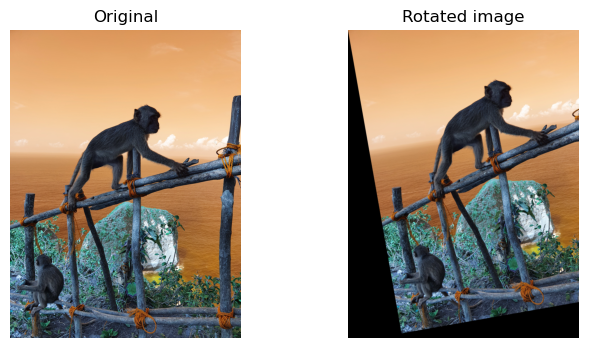

In [16]:
im_org = cv2.imread('NusaPenida.png', cv2.IMREAD_UNCHANGED)
# angle in degrees - counter clockwise
rotation_angle = 10
rot_center = [0, 0]
rotated_img = rotate(im_org, rotation_angle, center=rot_center)
show_comparison(im_org, rotated_img, "Rotated image")

## Exercise 2
Experiment with different center points and notice the results.

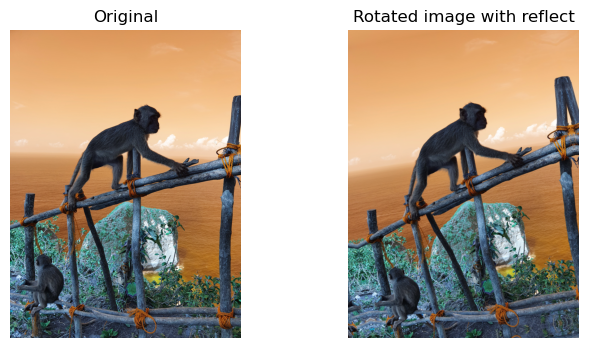

In [19]:
rotated_img_refl = rotate(im_org, rotation_angle, mode="reflect")
show_comparison(im_org, rotated_img_refl, "Rotated image with reflect")

## Exercise 3
Try the rotation with background filling mode reflect and wrap and notice the results and differences.

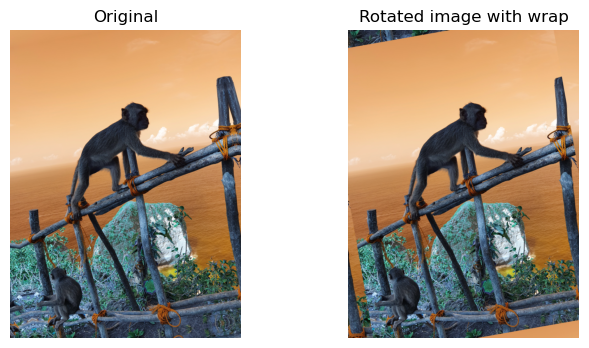

In [18]:
rotated_img_wrap = rotate(im_org, rotation_angle, mode="wrap")
show_comparison(rotated_img_refl, rotated_img_wrap, "Rotated image with wrap")

## Exercise 4
Try to use:

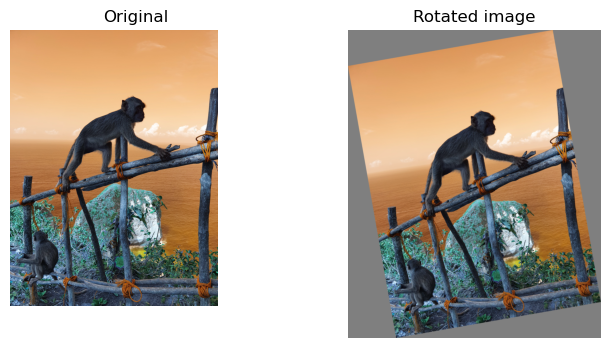

In [27]:
rotated_img = rotate(im_org, rotation_angle, resize=True, 
                     mode="constant", cval=0.5)
show_comparison(im_org, rotated_img, "Rotated image")

## Exercise 5
Test the use of automatic resizing:

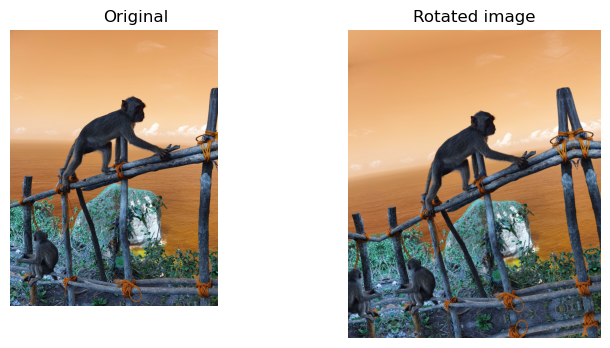

In [30]:
rotated_img = rotate(im_org, rotation_angle, resize=True, mode="reflect")
show_comparison(im_org, rotated_img, "Rotated image")

## Exercise 6
Start by defining the transformation:

In [31]:
# angle in radians - counter clockwise
rotation_angle = 10.0 * math.pi / 180.
trans = [10, 20]
tform = EuclideanTransform(rotation=rotation_angle, translation=trans)
print(tform.params)

[[ 0.98480775 -0.17364818 10.        ]
 [ 0.17364818  0.98480775 20.        ]
 [ 0.          0.          1.        ]]


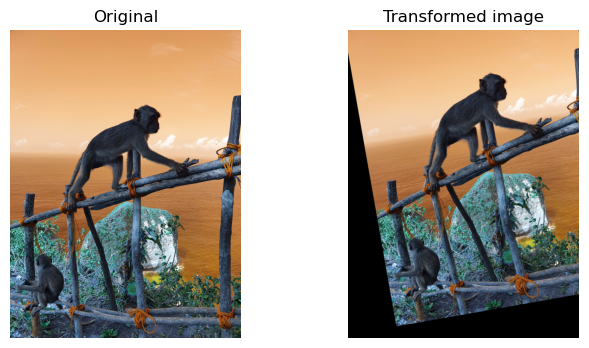

In [33]:
transformed_img = warp(im_org, tform)
show_comparison(im_org, transformed_img, "Transformed image")

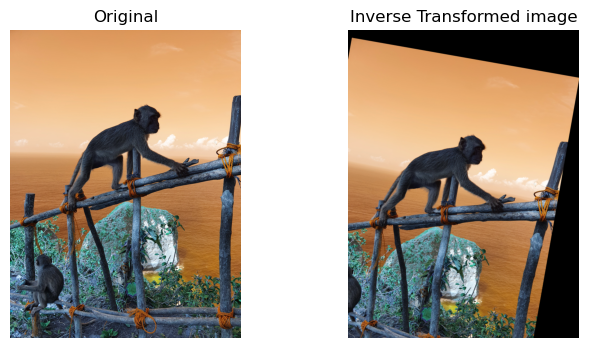

In [35]:
transformed_img_inv = warp(im_org, tform.inverse)
show_comparison(im_org, transformed_img_inv, "Inverse Transformed image")

## Exercise 8
Construct a Euclidean transformation with only rotation. Test the transformation and the invers transformation and notice the effect.

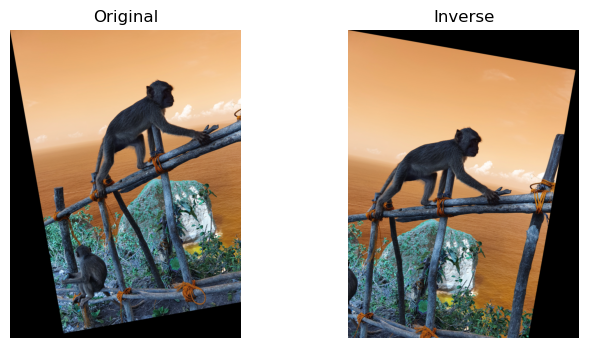

In [39]:
rotation_angle = 10.0 * math.pi / 180.
tform = EuclideanTransform(rotation=rotation_angle)
transformed_img = warp(im_org, tform)
transformed_img_inv = warp(im_org, tform.inverse)
show_comparison(transformed_img, transformed_img_inv, "Inverse")

## Exercise 9
Define a SimilarityTransform with an angle of 15°, a translation of (40, 30) and a scaling of 0.6 and test it on the image.

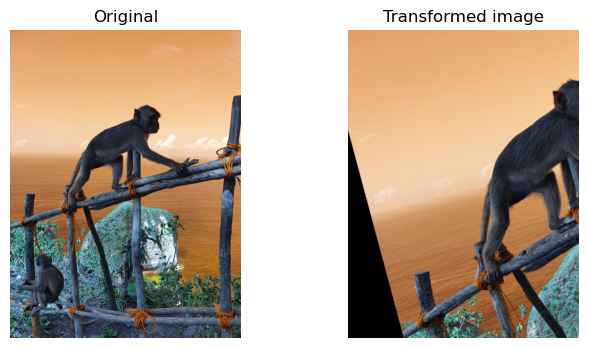

In [40]:
rotation_angle = 15.0 * math.pi / 180.0
trans = [40, 30]
scale = 0.6
tform = SimilarityTransform(scale=scale, rotation=rotation_angle, translation=trans)
transformed_img = warp(im_org, tform)
show_comparison(im_org, transformed_img, "Transformed image")

## Exercise 10
Try the swirl transformation:

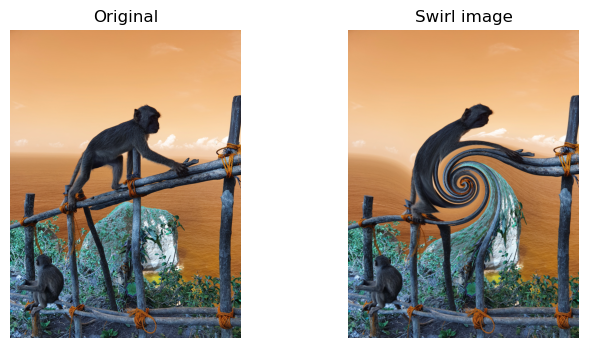

In [41]:
str = 10
rad = 300
swirl_img = swirl(im_org, strength=str, radius=rad)
show_comparison(im_org, swirl_img, "Swirl image")

## Exercise 11
Start by reading the two images into src_img and dst_img. Visualize their overlap by:

In [43]:
from skimage.util import img_as_float

src_img = cv2.imread("Hand1.jpg", cv2.IMREAD_GRAYSCALE)
dst_img = cv2.imread("Hand2.jpg", cv2.IMREAD_GRAYSCALE) 

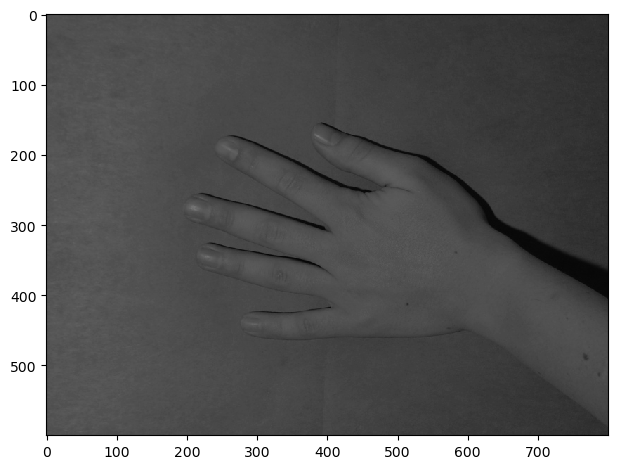

In [46]:
blend = 0.5 * img_as_float(dst_img)
io.imshow(blend)
io.show()

## Exercise 12
We have manually placed a set of landmarks on the source image. They can be visualized by:

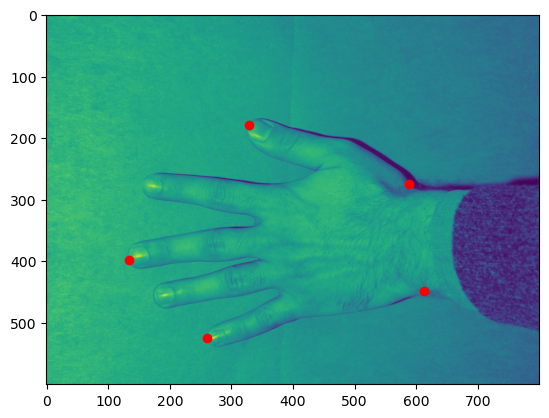

In [45]:
import numpy as np
src = np.array([[588, 274], [328, 179], [134, 398], [260, 525], [613, 448]])

plt.imshow(src_img)
plt.plot(src[:, 0], src[:, 1], '.r', markersize=12)
plt.show()

## Exercise 13
You should now place the same landmarks on the destination image.

In imshow you can see the pixel coordinates of the cursor:

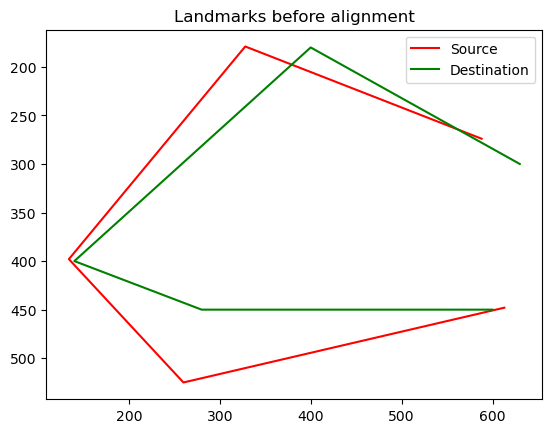

In [50]:
dst = np.array([[630, 300], [400, 180], [140, 400], [280, 450], [600, 450]])

fig, ax = plt.subplots()
ax.plot(src[:, 0], src[:, 1], '-r', markersize=12, label="Source")
ax.plot(dst[:, 0], dst[:, 1], '-g', markersize=12, label="Destination")
ax.invert_yaxis()
ax.legend()
ax.set_title("Landmarks before alignment")
plt.show()

## Exercise 14
Compute F from your landmarks. It can for example be done like:

In [51]:
e_x = src[:, 0] - dst[:, 0]
error_x = np.dot(e_x, e_x)
e_y = src[:, 1] - dst[:, 1]
error_y = np.dot(e_y, e_y)
f = error_x + error_y
print(f"Landmark alignment error F: {f}")

Landmark alignment error F: 13863


In [57]:
from skimage.transform import matrix_transform
tform = EuclideanTransform()
tform.estimate(src, dst)
src_transform = matrix_transform(src, tform.params)

## Exercise 15
Visualize the transformed source landmarks together with the destination landmarks. Also compute the objective function F using the transformed points. What do you observe?

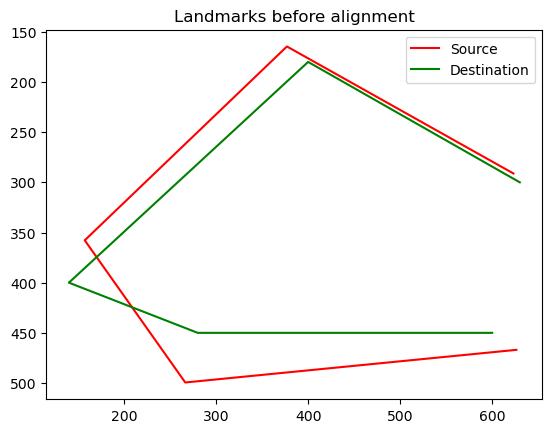

In [58]:
fig, ax = plt.subplots()
ax.plot(src_transform[:, 0], src_transform[:, 1], '-r', markersize=12, label="Source")
ax.plot(dst[:, 0], dst[:, 1], '-g', markersize=12, label="Destination")
ax.invert_yaxis()
ax.legend()
ax.set_title("Landmarks before alignment")
plt.show()

In [59]:
e_x = src_transform[:, 0] - dst[:, 0]
error_x = np.dot(e_x, e_x)
e_y = src_transform[:, 1] - dst[:, 1]
error_y = np.dot(e_y, e_y)
f = error_x + error_y
print(f"Landmark alignment error F: {f}")

Landmark alignment error F: 6580.946773252112
